# Light example, use influence diagrams during problem diagnosis


### Actors:
- system which via embeded influence diagram can help diagnosing problems in a system
- repair specialist who needs to solve a problem that prevents normal operation of a system



Start of scenario is when a repair specialist is called in to help solve a problem at a user. The repair specialist brings a laptop containing a system that guides the steps. First step is to start the software.

### starting the software

In [1]:
# imports
import os
import math
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

from pylab import *
from IPython.display import display,HTML

# pyAgrum
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

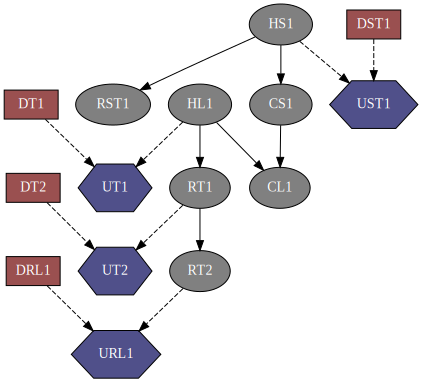

In [3]:
# create influence diagram, load BIFXML file
diag = gum.InfluenceDiagram()
diag.loadBIFXML("lightv5.xml") 
gnb.showInfluenceDiagram(diag, size=80)

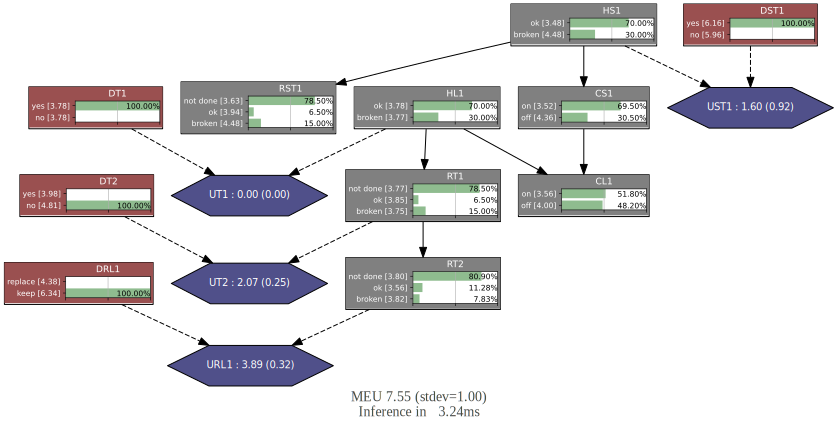

In [5]:
# create inference without any evidence
ie = gum.ShaferShenoyLIMIDInference(diag) 
ie.addNoForgettingAssumption(["DT1","DT2", "DRL1", "DST1" ])
gnb.showInference(diag, engine=ie, evs={}, size=15)

Inference results show "normal operation", no tests are recommended (DT1, DT2, DS1T1)







### start diagnosis 
- after startup the system asks to provide evidence on the problem the users are facing
- the repair specialist enters light 1 is not on
- the system calculates the most probable situation for the system and derives a next step

In [4]:
diag.utility("UT1")[{"HL1":"ok", "DT1": "yes"}]     = 1   # test done but not relevant
diag.utility("UT1")[{"HL1":"broken", "DT1": "yes"}] = 3      # test done when broken, excellent
diag.utility("UT1")[{"HL1":"ok", "DT1": "no"}]      = 2    # test not done but that's ok
diag.utility("UT1")[{"HL1":"broken", "DT1": "no"}]  = 0   # test not done when broken: missed chance


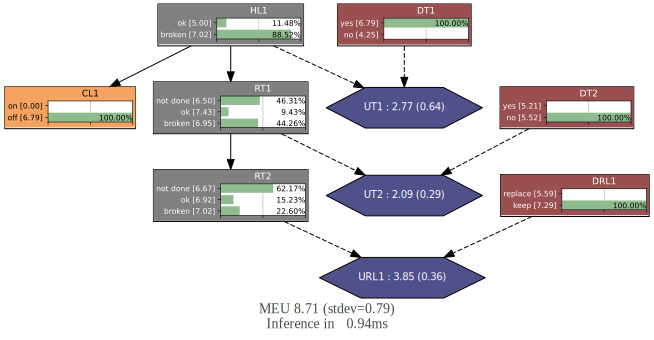

In [5]:
# calculate situation given evidence: light 1 is off
ie = gum.ShaferShenoyLIMIDInference(diag) 
ie.addNoForgettingAssumption(["DT1","DT2", "DRL1"])
gnb.showInference(diag, engine=ie, evs={"CL1":1}, size=15)

- Inference of the situation with provided evidence "light 1 is off" indicates a higher change light 1 is broken, via the L1H variable. This leads the system to suggest to execute test 1, via a >50% chance for decision DT1 = "Yes".
- Based on this result the repair specialist is instructed to execute test 1.
- Test 1 is the cheapest of the tests that can be done to check the health of light 1.

### Test 1 performed
- As instructed the repair specialist executes test 1 and provides the result to the system.
- The result of test 1 is evidence that indicates light 1 is probably broken.
- the system is asked for the next step

In [ ]:
diag.utility("UT2")[{"RT1":"not done", "DT2": "yes"}]     = 2   # test done but not relevant
diag.utility("UT2")[{"RT1":"not done", "DT2": "no"}]      = 4   # test not done but not relevant
diag.utility("UT2")[{"RT1":"ok", "DT2": "yes"}]           = 0   # test done but not relevant
diag.utility("UT2")[{"RT1":"ok", "DT2": "no"}]            = 3   # test not done but that's ok
diag.utility("UT2")[{"RT1":"broken", "DT2": "yes"}]       = 5   # test done when broken, excellent
diag.utility("UT2")[{"RT1":"broken", "DT2": "no"}]        = 2   # test not done when broken: missed chance

In [6]:
diag.utility("UT2")[{"RT1":"not done", "DT2": "yes"}]     = 1   # test done but not relevant
diag.utility("UT2")[{"RT1":"ok", "DT2": "yes"}]           = 0   # test done but not relevant
diag.utility("UT2")[{"RT1":"broken", "DT2": "yes"}]       = 3   # test done when broken, excellent
diag.utility("UT2")[{"RT1":"not done", "DT2": "no"}]      = 2   # test not done but not relevant
diag.utility("UT2")[{"RT1":"ok", "DT2": "no"}]            = 3   # test not done but that's ok
diag.utility("UT2")[{"RT1":"broken", "DT2": "no"}]        = 2   # test not done when broken: missed chance

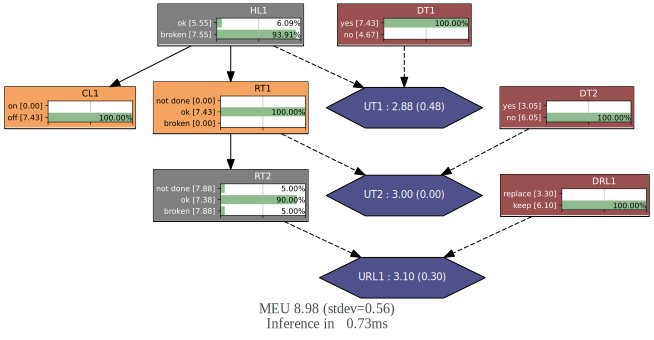

In [10]:
# calculate situation given evidencce light 1 is off and test 1 indicate light is broken
ie = gum.ShaferShenoyLIMIDInference(diag) 
ie.addNoForgettingAssumption(["DT1","DT2", "DRL1"])
gnb.showInference(diag, engine=ie, evs={"CL1":1, "RT1": 1}, size=15)

In [ ]:
diag.utility("UT2")

- Results show a second test is recommended by the system, via decision DT2.
- The system instructs the repair specialist to execute test 2.

### Test 2 performed
- repair specialist excutes test 2 and provides result to the system.
- the evidence is the light is definitely broken.

In [8]:
diag.utility("URL1")[{"RT2":"not done", "DRL1": "replace"}]    = 2   # test done but not relevant
diag.utility("URL1")[{"RT2":"not done", "DRL1": "keep"}]       = 4   # test not done but that's ok
diag.utility("URL1")[{"RT2":"ok", "DRL1": "replace"}]          = 0   # test done but not relevant
diag.utility("URL1")[{"RT2":"ok", "DRL1": "keep"}]             = 3   # test not done but that's ok
diag.utility("URL1")[{"RT2":"broken", "DRL1": "replace"}]      = 4   # test done when broken, excellent
diag.utility("URL1")[{"RT2":"broken", "DRL1": "keep"}]         = 4   # test not done when broken: missed chance

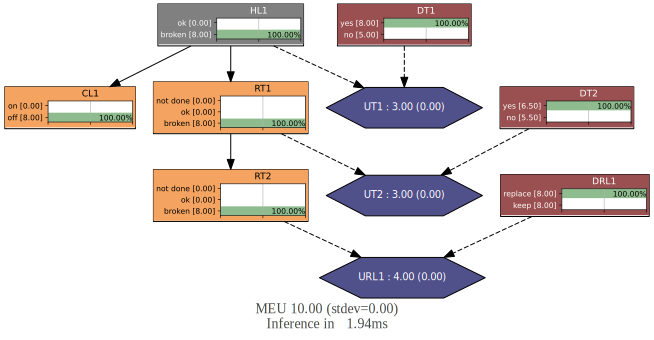

In [9]:
# calculate situation given evidencce light 1 is off, test 1 & test 2 indicate light is broken
ie = gum.ShaferShenoyLIMIDInference(diag) 
ie.addNoForgettingAssumption(["DT1","DT2", "DRL1"])
gnb.showInference(diag, engine=ie, evs={"CL1":1, "RT1": 2, "RT2": 2}, size=15)

- Given the results the system now instructs the repair specialist to replace the light, based on result of RT2.
- The repair specialist is asked to confirm the light is replaced.

### new starting point after replacement of light 1

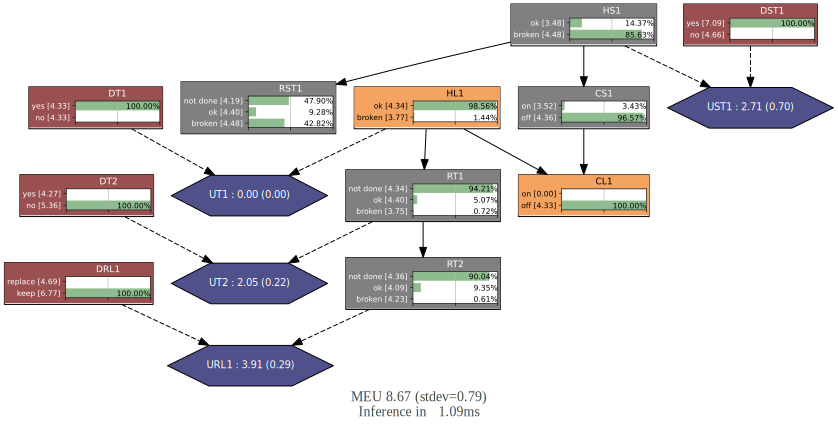

In [9]:
# inference after light 1 is replaced, chance of failure of light 1 is now between 80/90%
ie = gum.ShaferShenoyLIMIDInference(diag) 
ie.addNoForgettingAssumption(["DT1","DT2", "DRL1", "DST1"])
gnb.showInference(diag, engine=ie, evs={"HL1":[0.99, 0.01],"CL1":1}, size=15)

- Repair specialist is asked if system is running as expected and this is confirmed. 